In [1]:
import datetime
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import tables
from tqdm import tqdm
#%matplotlib inline
import random
import math

In [5]:
import numpy as np
from scipy.stats import ranksums
rng = np.random.default_rng()
sample1 = rng.uniform(-1, 1, 200) # numpy.ndarray
sample2 = rng.uniform(-0.5, 1.5, 300) # a shifted distribution
ranksums(sample1, sample2)

RanksumsResult(statistic=-8.165693681091225, pvalue=3.1959331518315036e-16)

In [2]:
df1 = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\sine_gratings_8_directions\data_preprocessed.hdf5")
df2 = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\plaids\data_preprocessed.hdf5")

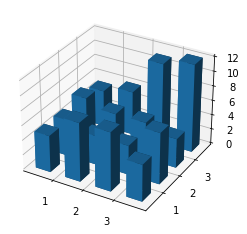

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [3]:
frames = [df1, df2]
result = pd.concat(frames)

In [4]:
# some generalization at first! for df1  we have 0-10,10-,40,40-50. and df2 has 0-30,30-60.

,index,setup_index,arena_index,experiment_repeat,fish_ID,folder_name,fish_genotype,fish_age,stimulus_name,trial,...,radius,time,left_bouts,right_bouts,straight_bouts,bout_orientation,bout_orientation_absolute,left_bouts_absolute,right_bouts_absolute,ring_membership
0,5156,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_leftup45,0,...,0.680450,6.741165,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0
1,5157,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_leftup45,0,...,0.689678,8.552262,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0
2,5158,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_leftup45,0,...,0.739272,12.607784,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0
3,5159,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_leftup45,0,...,0.758108,13.196668,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0
4,5160,2,0,0,0,2022-12-15_15-40-15_setup2_arena0,WT,5 dpf,motion_leftup45,0,...,0.786610,13.729997,0.0,1.0,0.0,1.0,1.0,0.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631920,806736,1,7,0,105,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_forward,16,...,0.911741,32.661875,1.0,0.0,0.0,-1.0,-1.0,1.0,0.0,8.0
631921,806737,1,7,0,105,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_forward,16,...,0.911823,33.250759,0.0,0.0,1.0,0.0,1.0,0.0,1.0,8.0
631922,806738,1,7,0,105,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_forward,16,...,0.912315,33.572979,0.0,0.0,1.0,0.0,-1.0,1.0,0.0,8.0
631923,806739,1,7,0,105,2022-12-20_16-50-22_setup1_arena7,WT,5 dpf,motion_forward,16,...,0.914938,34.184085,0.0,0.0,1.0,0.0,1.0,0.0,1.0,8.0


In [ ]:
# we start with df2 bcs easier. groupby trial and then time bins!